# 1.7 アイリスのクラス分類
## 訓練と評価の過程

In [27]:
import time
import numpy as np
from scipy import sparse
from IPython.display import display
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Key on iris_dataset:\n{}".format(iris_dataset.keys()))

Key on iris_dataset:
dict_keys(['DESCR', 'target', 'data', 'target_names', 'feature_names'])


花弁(petal)の長さと幅、ガク(sepal)の長さと幅

In [50]:
for key in iris_dataset.keys():
    print("####### key: {} ########".format(key))
    print(iris_dataset[key][:4])

####### key: target_names ########
['setosa' 'versicolor' 'virginica']
####### key: target ########
[0 0 0 0]
####### key: feature_names ########
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
####### key: data ########
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]]
####### key: DESCR ########
Iris


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [53]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe['target'] = pd.DataFrame(y_train)

In [55]:
iris_dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.9,3.0,4.2,1.5,1
1,5.8,2.6,4.0,1.2,1
2,6.8,3.0,5.5,2.1,2
3,4.7,3.2,1.3,0.2,0
4,6.9,3.1,5.1,2.3,2


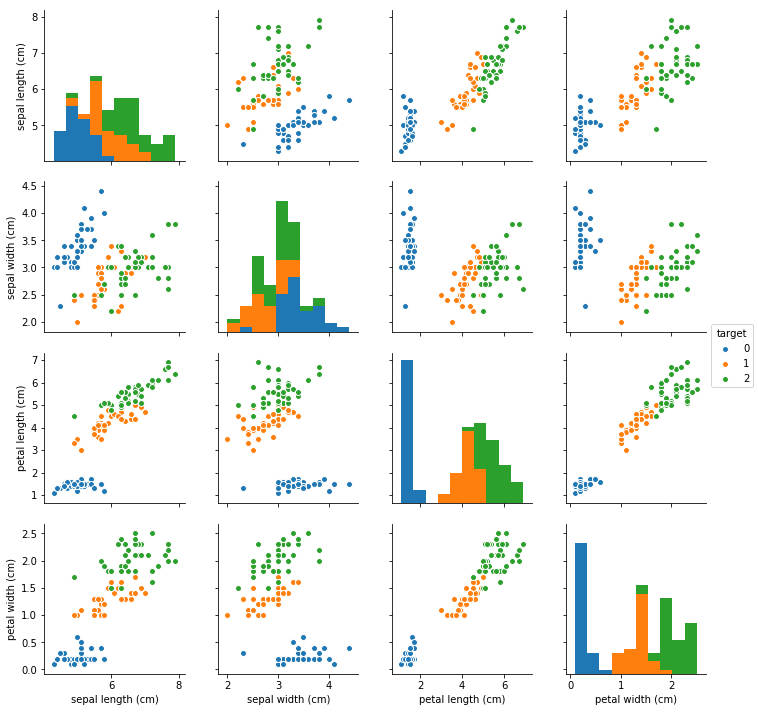

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data = iris_dataframe, hue="target", vars=iris_dataset.feature_names)
plt.show()

花弁(petal)の長さと幅、ガク(sepal)でわかれてる。

In [57]:
from sklearn.neighbors import KNeighborsClassifier
# 訓練データからモデルを構築するアルゴリズムと新しいデータポイントに対して予測するためのアルゴリズムのカプセル化
knn = KNeighborsClassifier(n_neighbors=1) #n_neighborsの場合は一番近いデータのみ同じクラスとする。最近傍法。

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [59]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [60]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## 最小の手順

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
                    iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


# シンプルなKNN

ユーグリッド距離

$$d(p, q) = d(q, p) = \sqrt{ (q1- p1)^{2} + (q2- p2)^{2} ... (qn- pn)^{2}} = \sqrt{\sum_{i=1}^{n}  (qi- pi)^{2}} $$

In [47]:
l2 = lambda x,y : np.sqrt(np.sum(np.square(np.subtract(x,y))))
distances = [l2(x,y) for x in X_test for y in X_train]
print(distances[:3])

[1.2922847983320083, 1.6401219466856722, 1.1357816691600549]


距離の近いK個を取得

In [45]:
K = 3
nearestneighbor = np.argsort(distances)[:K]
for near in nearestneighbor:
    print("%s is the nearest distance" % (near))

1787 is the nearest distance
1748 is the nearest distance
548 is the nearest distance


K個に含まれるデータから多数決でクラスを決める。